# NYC Crime

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import folium 
from folium import plugins
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
sns.set()

In [3]:
df=pd.read_csv(r'NYC_crime.csv')
df.head(5)

,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


In [4]:
df.describe()

,Unnamed: 0,arrest_key,latitude,longitude,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
count,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.876013e+06,3.876009e+06,3.876013e+06,3.876012e+06
mean,1.940994e+06,9.561076e+07,4.075640e+01,-7.392380e+01,6.063338e+01,1.303597e+00,3.688190e+01,3.379998e+00,2.868685e+01,3.746300e+01
std,1.120634e+06,5.213869e+07,4.448528e-01,7.218261e-02,3.431000e+01,9.418710e+00,2.096916e+01,1.207421e+00,1.415032e+01,2.131845e+01
min,0.000000e+00,9.926903e+06,4.049891e+01,-7.425494e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.704970e+05,5.899852e+07,4.067957e+01,-7.396708e+01,3.300000e+01,0.000000e+00,1.700000e+01,2.000000e+00,1.700000e+01,2.100000e+01
50%,1.940994e+06,8.327876e+07,4.074166e+01,-7.392548e+01,6.000000e+01,0.000000e+00,4.100000e+01,4.000000e+00,3.100000e+01,3.500000e+01
75%,2.911491e+06,1.435049e+08,4.081609e+01,-7.388586e+01,8.400000e+01,0.000000e+00,5.500000e+01,4.000000e+00,4.000000e+01,5.400000e+01
max,3.881988e+06,2.068936e+08,6.208307e+01,-7.368178e+01,1.230000e+02,9.700000e+01,7.100000e+01,5.000000e+00,5.100000e+01,7.700000e+01


In [5]:
df.isnull().sum()

Unnamed: 0                         0
arrest_key                         0
arrest_date                        0
pd_desc                            0
ofns_desc                          0
law_code                           0
law_cat_cd                     13360
age_group                          0
perp_sex                           0
perp_race                          0
latitude                           0
longitude                          0
arrest_boro                        0
arrest_precinct                    0
jurisdiction_code                  0
:@computed_region_f5dn_yrer     5976
:@computed_region_yeji_bk3q     5980
:@computed_region_92fq_4b7q     5976
:@computed_region_sbqj_enih     5977
dtype: int64

In [6]:
df= df.rename(columns={':@computed_region_f5dn_yrer' : 'Community District',
                             ':@computed_region_yeji_bk3q' : 'Borough Boundaries',
                             ':@computed_region_92fq_4b7q' : 'City Council Districts',
                             ':@computed_region_sbqj_enih' : 'Police Precincts'})
df = df.drop(columns=['Unnamed: 0'])
df['arrest_date'] = pd.to_datetime(df['arrest_date'], format='%Y-%m-%d')
df['law_cat_cd'] = df['law_cat_cd'].map({'F':'Felony',
                                                'M':'Misdemeanor',
                                                'V':'Violation',
                                                'I':'Infractions'})
df['arrest_boro'] =df['arrest_boro'].map({'M':'Manhatten', 
                                        'K':'Brooklyn', 
                                        'Q':'Queens', 
                                        'B':'Bronx', 
                                        'S':'Statten Island'})
df['year'] = pd.DatetimeIndex(df['arrest_date']).year
df


,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts,year
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,Manhatten,25,0.0,7.0,4.0,36.0,16.0,2019
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,Manhatten,14,0.0,12.0,4.0,10.0,8.0,2019
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,Felony,25-44,M,BLACK,40.648650,-73.950336,Brooklyn,67,0.0,61.0,2.0,11.0,40.0,2016
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,Felony,25-44,M,BLACK,40.674583,-73.930222,Brooklyn,77,0.0,16.0,2.0,49.0,49.0,2018
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,Misdemeanor,45-64,M,BLACK,40.671254,-73.926714,Brooklyn,77,2.0,16.0,2.0,49.0,49.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881984,24592084,2006-10-01,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",GRAND LARCENY,PL 1553001,Felony,<18,M,BLACK,40.676655,-73.916466,Brooklyn,73,0.0,69.0,2.0,17.0,52.0,2006
3881985,24028282,2006-08-25,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,PL 2214000,Misdemeanor,<18,M,WHITE,40.625264,-73.998697,Brooklyn,62,0.0,10.0,2.0,7.0,41.0,2006
3881986,24036787,2006-08-26,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,Misdemeanor,18-24,M,BLACK,40.801304,-73.936106,Manhatten,25,0.0,7.0,4.0,35.0,16.0,2006
3881987,24028407,2006-08-25,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",VEHICLE AND TRAFFIC LAWS,VTL05110E2,Felony,25-44,M,BLACK,40.675505,-73.899692,Brooklyn,75,0.0,45.0,2.0,37.0,47.0,2006


In [7]:
df['ofns_desc'].unique()

array(['SEX CRIMES', 'CONTROLLED SUBSTANCES OFFENSES', 'RAPE',
       'CRIMINAL TRESPASS', 'ASSAULT 3 & RELATED OFFENSES', 'THEFT',
       'FELONY ASSAULT', 'PROSTITUTION & RELATED OFFENSES',
       'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW', 'DANGEROUS DRUGS',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY 5', 'FORGERY', 'BURGLARY',
       'ROBBERY', 'FORCIBLE TOUCHING', 'OFFENSES INVOLVING FRAUD',
       'TERRORISM', 'ARSON', 'LARCENY', 'SEX OFFENSES', 'THEFT-FRAUD',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'F.C.A. P.I.N.O.S.', 'ASSAULT', 'OFFENSES AGAINST THE PERSON',
       'PROSTITUTION OFFENSES', 'FIREARMS AND OTHER DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'VEHICLE AND TRAFFIC LAWS', 'OTHER OFFENSES RELATED TO THEFT',
       'DISORDERLY CONDUCT', 'GRAND LARCENY', 'PETIT LARCENY',
       'OTHER TRAFFIC INFRACTION', "BURGLAR'S TOOLS",
       'OTHER STATE LAWS (NON PENAL LAW)',
       'INTOXICATED & IMPA

In [8]:
df['ofns_desc'].value_counts()

DANGEROUS DRUGS                     835598
ASSAULT 3 & RELATED OFFENSES        380510
OTHER OFFENSES RELATED TO THEFT     235898
OTHER STATE LAWS                    187193
PETIT LARCENY                       162330
                                     ...  
GAMBLING OFFENSES                        1
NYS LAWS-UNCLASSIFIED VIOLATION          1
OFFENSES AGAINST SERVICE ANIMALS         1
OTHER PUBLIC SAFETY OFFENSES             1
LOITERING,BEGGING                        1
Name: ofns_desc, Length: 99, dtype: int64

# MAP VISUALIZATION 

### Location of crimes symbolized by level of offense (2019)

df_2019=df[df['arrest_date'] >= '2019-12-01']
coordinate = [40.7128,-73.9060]
site_map = folium.Map(location=coordinate, zoom_start=11.3)
for lat,long1,labels in zip(df_2019.latitude,df_2019.longitude,df_2019.law_cat_cd):

     if labels == 'Misdemeanor':
        marker=folium.features.Circle([lat,long1],
                            radius=1,
                            color='#F1C40F'
                            ).add_child(folium.Popup(labels)).add_to(site_map)
     elif labels == 'Felony' :
        marker=folium.features.Circle([lat,long1],
                            radius=1,
                            color='#8E44AD'
                            ).add_child(folium.Popup(labels)).add_to(site_map)
                            
     elif labels == 'Violation' :
        marker=folium.features.Circle([lat,long1],
                            radius=1,
                            color='#229954',
                            ).add_child(folium.Popup(labels)).add_to(site_map)
     else :
        marker=folium.features.Circle([lat,long1],
                            radius=1,
                            color='#2E4053'
                            ).add_child(folium.Popup(labels)).add_to(site_map)


            
site_map.add_child(marker)  

## Where crimes occur most frequently?

In [10]:
df.pivot_table('arrest_key',index='arrest_boro',aggfunc="count").sort_values(by=['arrest_key'],ascending=False)

,arrest_key
arrest_boro,
Brooklyn,1078923
Manhatten,1051074
Bronx,887621
Queens,728183
Statten Island,136188


Heat Map Showing the ocurrrence of crimes 

coordinate = [40.7128,-73.9060]
site_map = folium.Map(location=coordinate, zoom_start=11)
heat_data=list(zip(df.latitude,df.longitude))
HeatMap(data=heat_data, radius=7.5).add_to(site_map)
site_map

# Stats

### Has crime changed over the years?

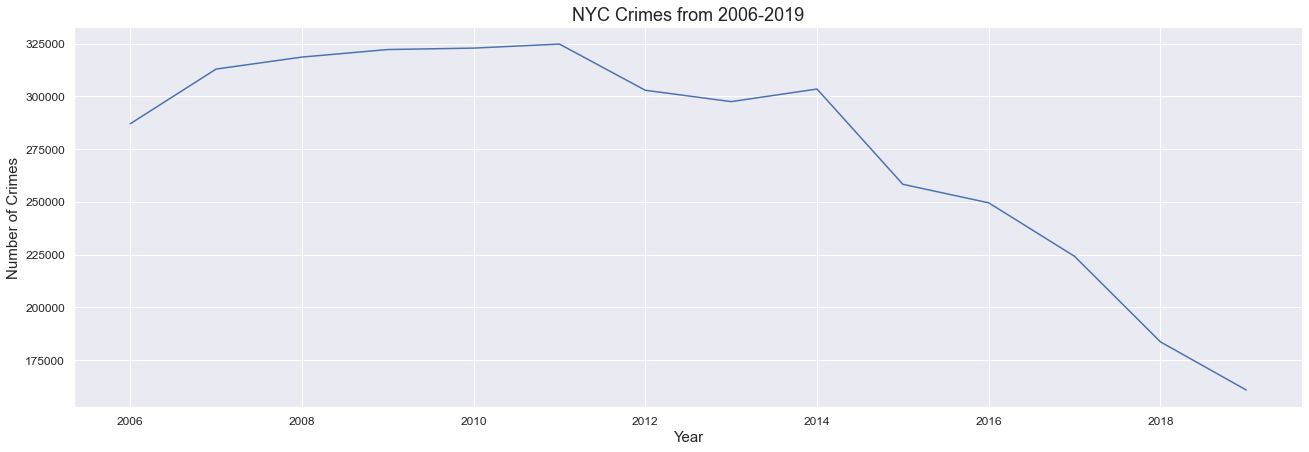

In [12]:
# Count & group crimes by year
df_byyear = df.pivot_table('law_cat_cd',index=['year'],aggfunc="count")
df_byyear.reset_index(inplace=True)

# Graph results 
ax= df_byyear.plot(x="year",figsize=(22, 7))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Crimes',fontsize=15)
plt.title('NYC Crimes from 2006-2019',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()


### Which crimes have been more frequent and which less frequent? 

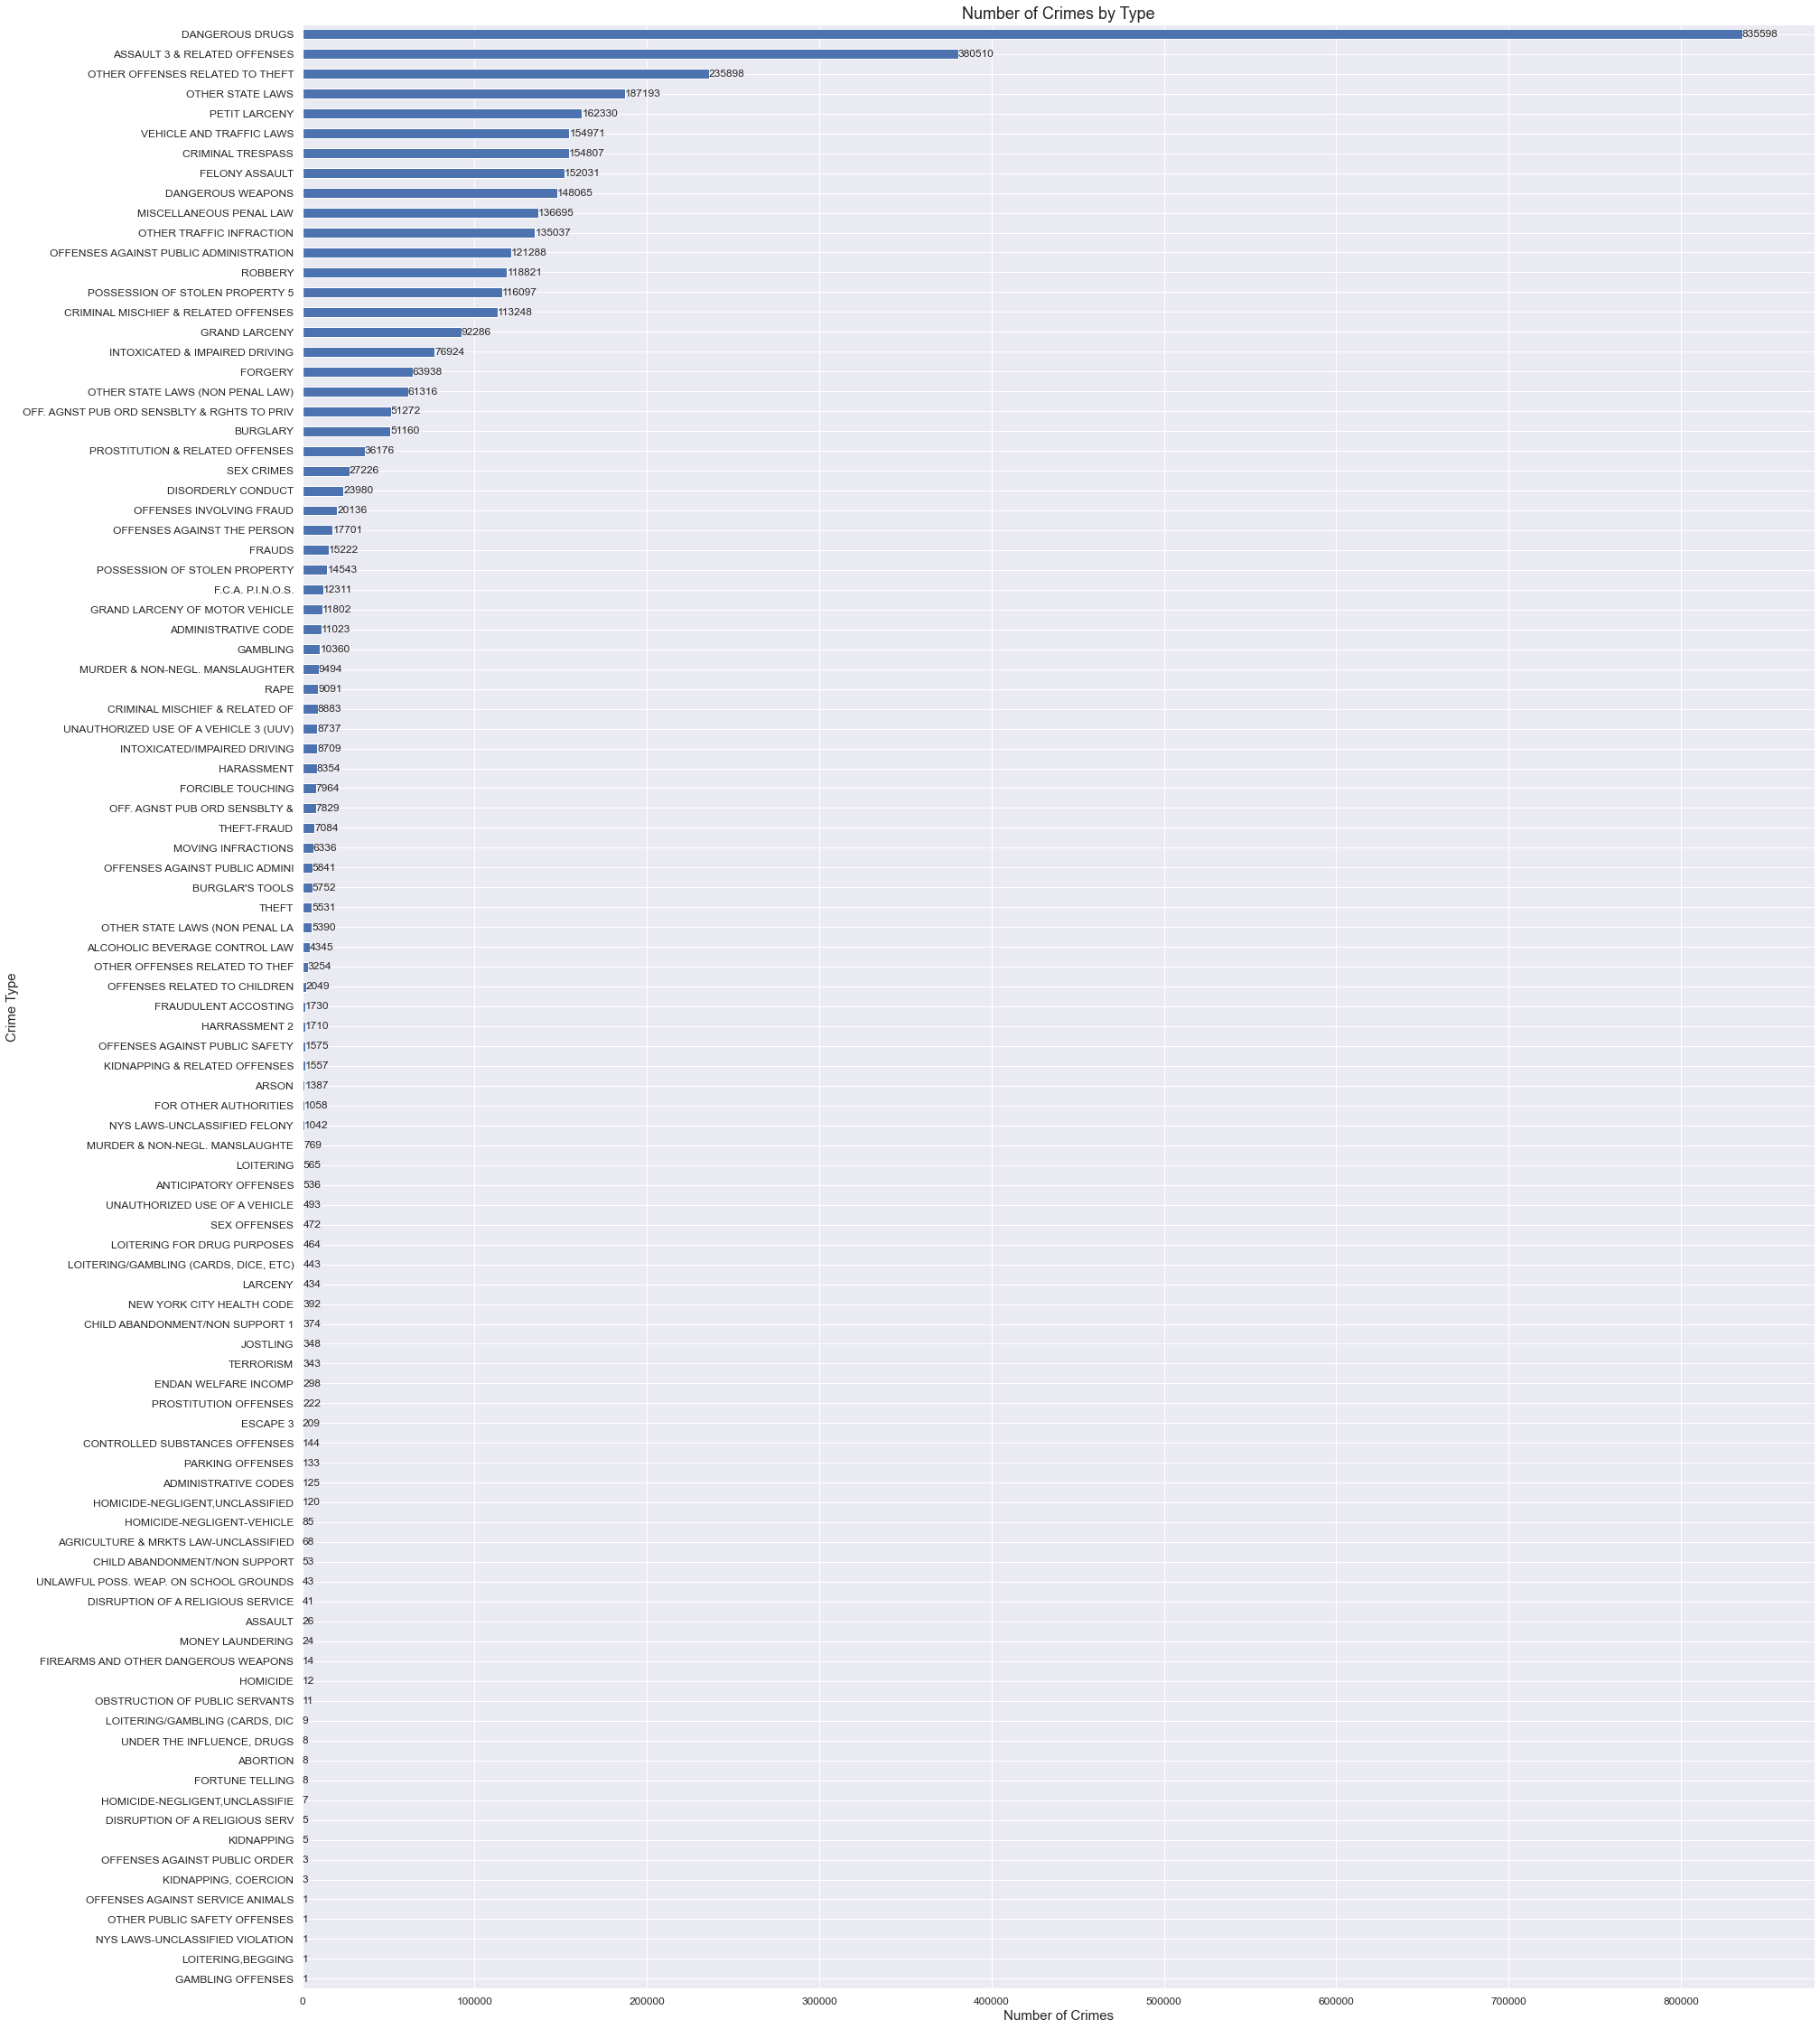

In [13]:
#Count crime and group by type
df_bycrime = df.groupby(['ofns_desc'])['arrest_key'].count().sort_values()
#Graph
ax = df_bycrime.plot(kind='barh',figsize=(30,40))
plt.xlabel('Number of Crimes',fontsize=15)
plt.ylabel('Crime Type',fontsize=15)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Number of Crimes by Type',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### What has been the behavior of the most common crimes over the years? 

<Figure size 432x288 with 0 Axes>

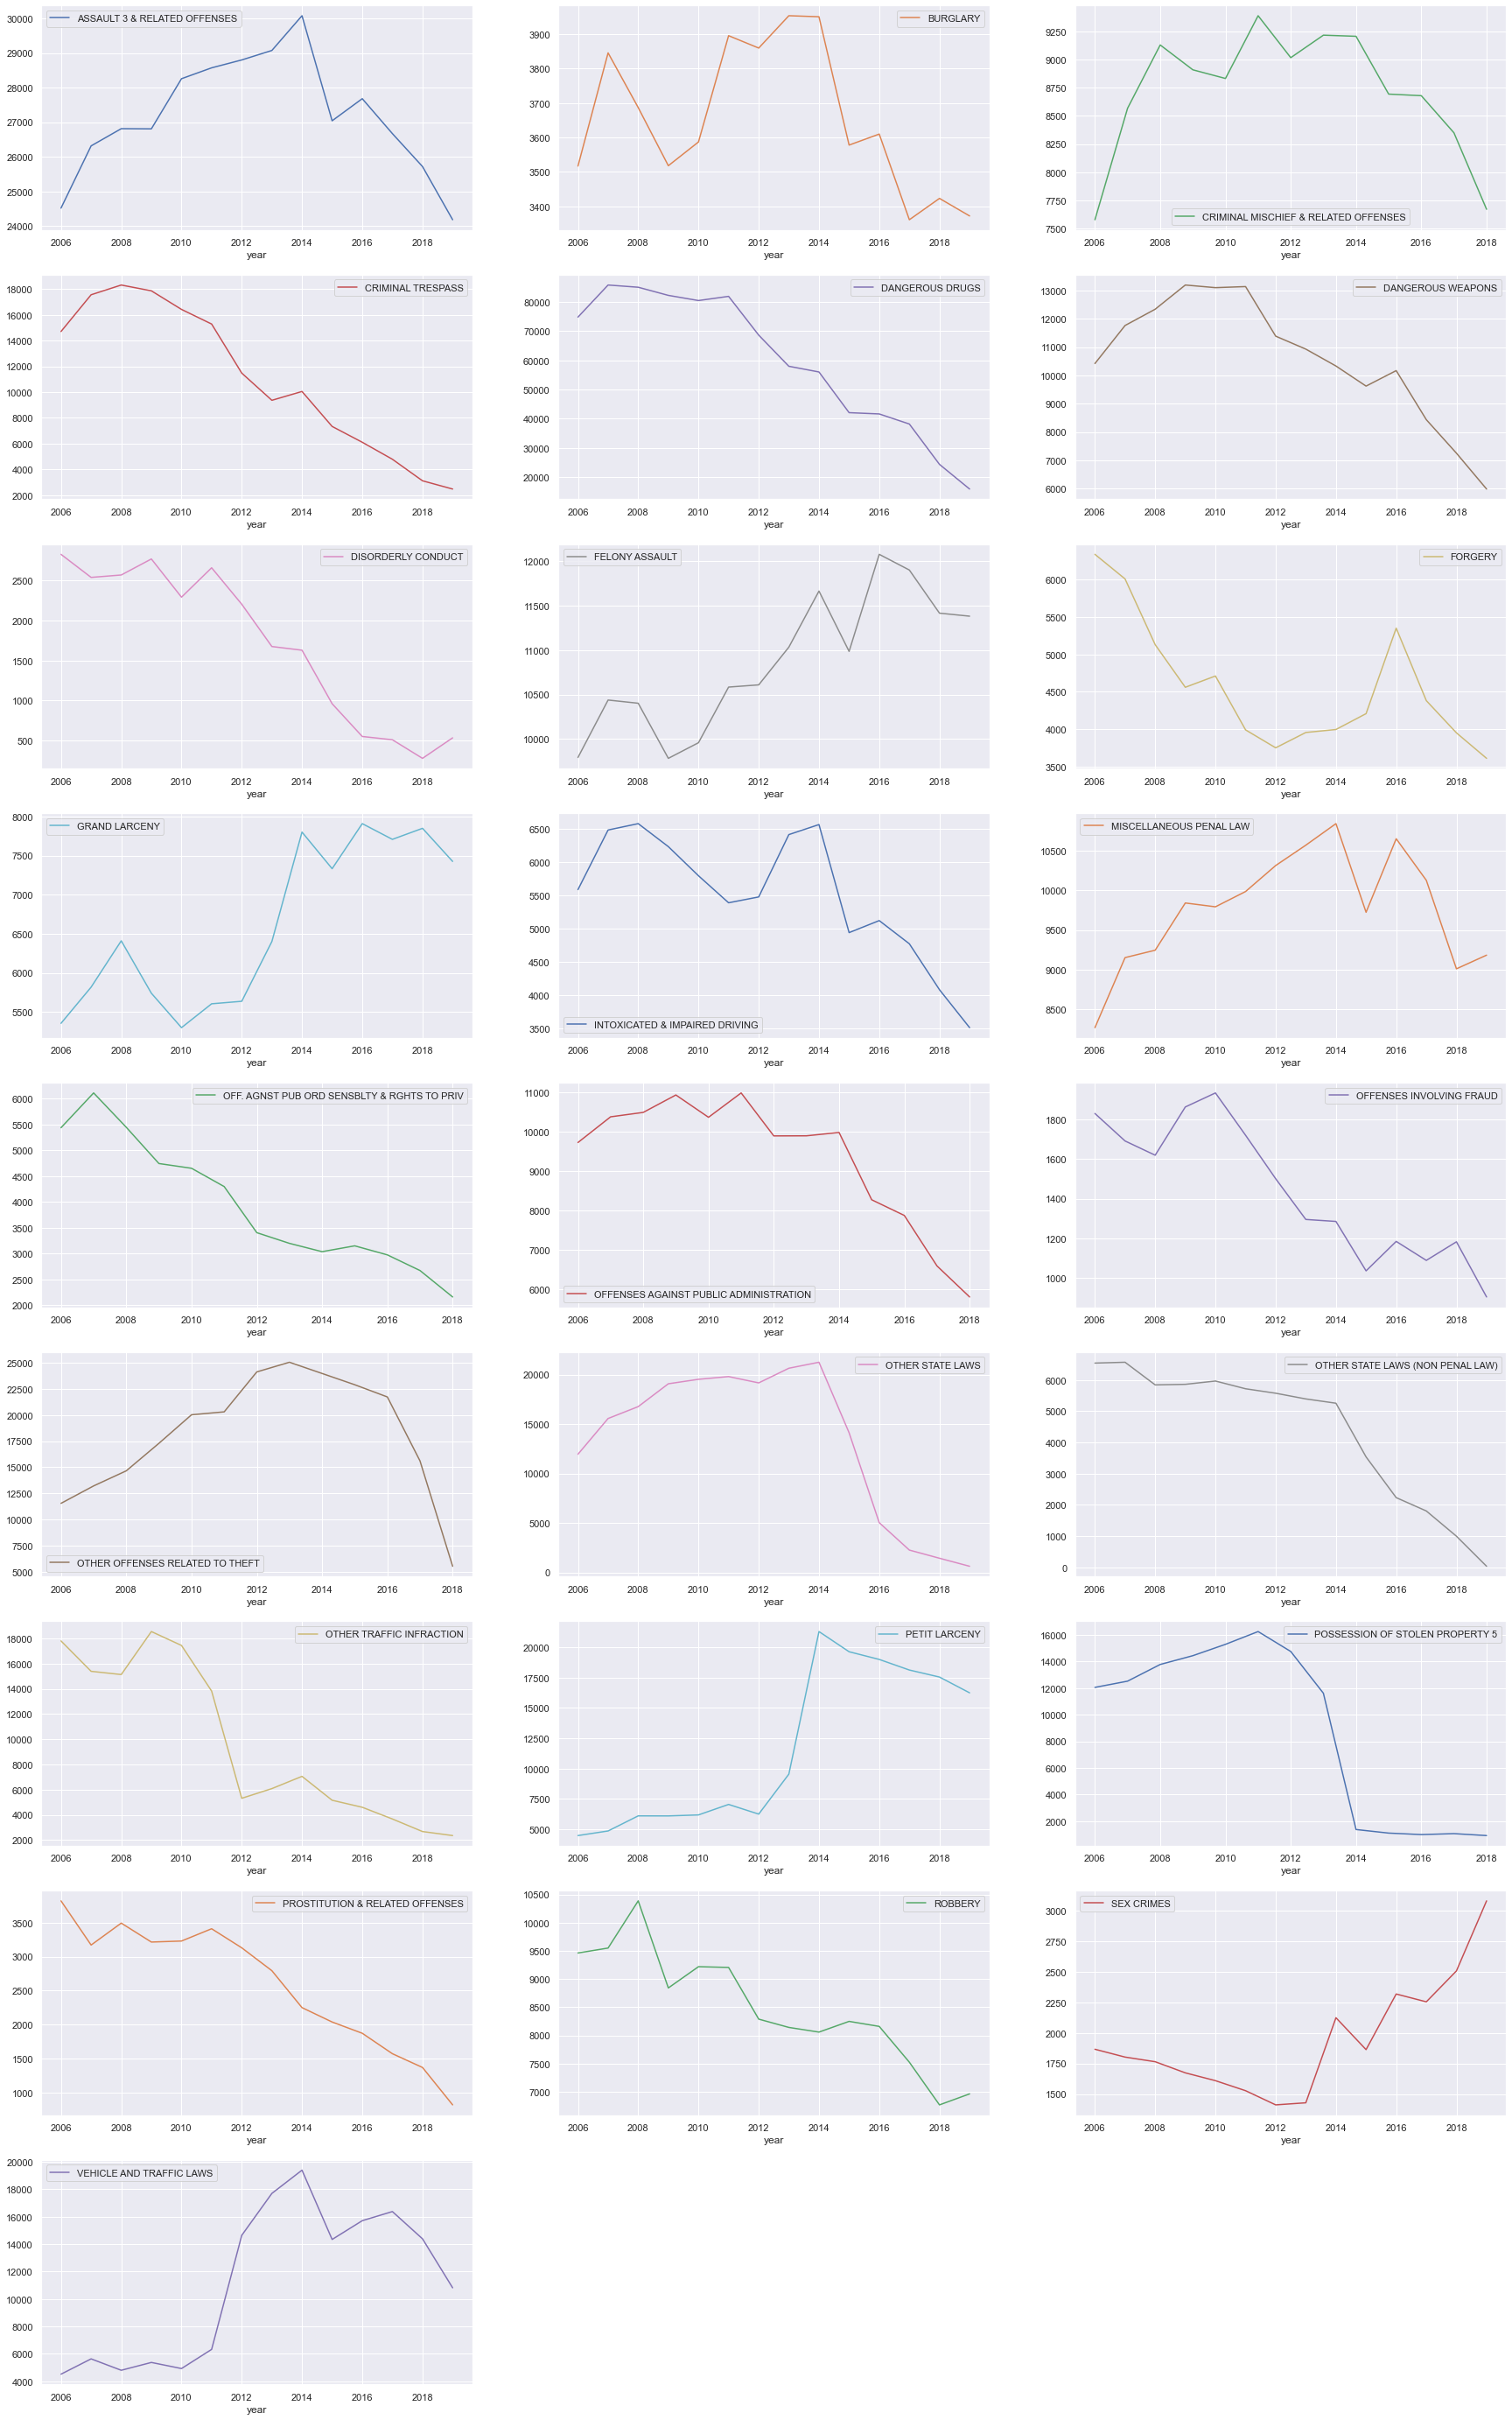

In [14]:
#filter the data
filt=df.groupby(['ofns_desc'])['arrest_key'].count().sort_values(ascending=False).iloc[0:25].reset_index()
filt=list(map(str, filt['ofns_desc']))
dffilt=df[df['ofns_desc'].isin(filt)]
#group the data and count number of crimes
dfcomp=dffilt.pivot_table('arrest_key',index='year',columns='ofns_desc',aggfunc='count')
fig = plt.figure()
ax=dfcomp.plot(figsize=(30,50), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

### How many crimes are committed by race?

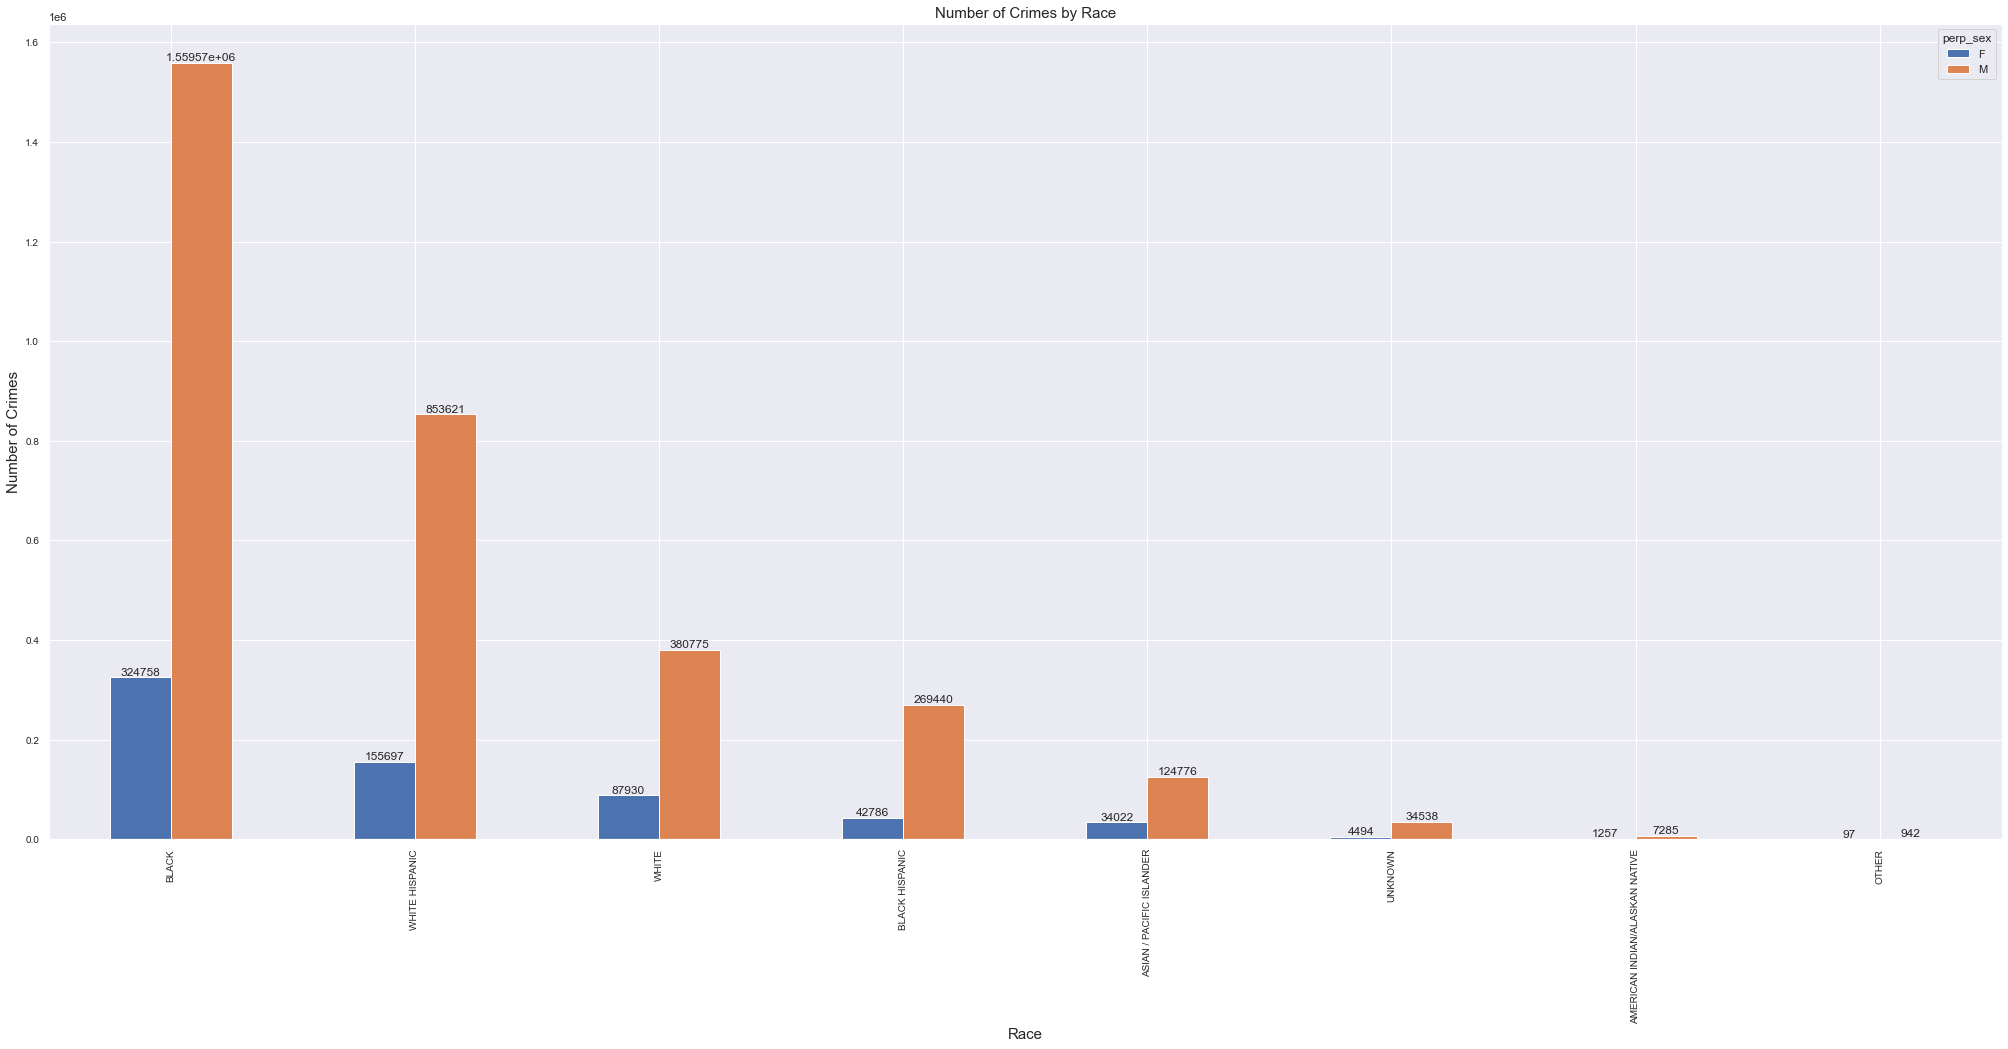

In [17]:

race=df.pivot_table('arrest_key',index='perp_race',columns='perp_sex',aggfunc="count").sort_values(by=['M'],ascending=False)
ax=race.plot(kind='bar',figsize=(35,15))
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Race',fontsize=15)
plt.ylabel('Number of Crimes',fontsize=15)
plt.title('Number of Crimes by Race',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### What is the percentage of crimes committed by race? 

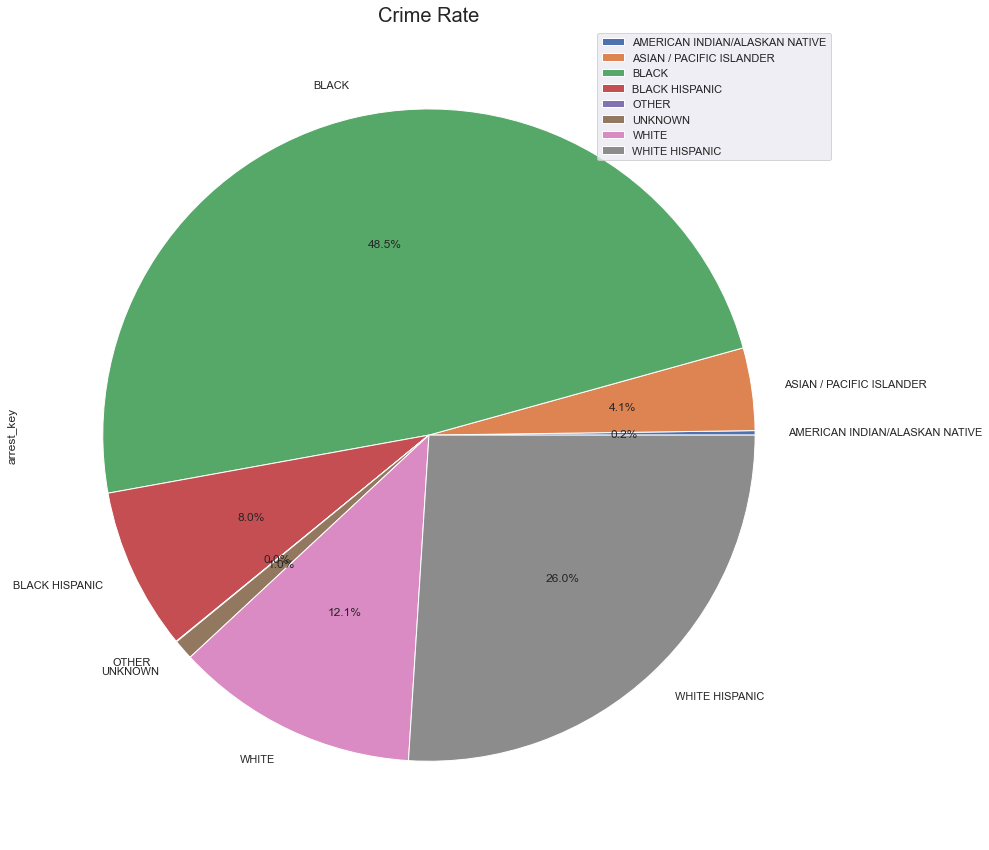

In [16]:
race2=df.pivot_table('arrest_key',index='perp_race',aggfunc="count")
race2.plot.pie(y='arrest_key',figsize=(30,15),autopct='%1.1f%%')
plt.title('Crime Rate',fontsize=20)
plt.show()